# AIM: Predicting Liver Cirrhosis Using Machine Learning Algorithms.

THE MAIN GOAL OF THIS PROJECT IS TO CLASSIFY WHICH MACHINE LEARNING ALGORITHM IS PERFORMING BETTER IN DETECTING LIVER CIRRHOSIS DISEASE DETECTION ON BASIS OF DATASET PROVIDED, WHICH INCLUDES VARIOUS PARAMETERS LIKE "ALBUMIN", "BILURUNIN" etc.


# **Liver cirrhosis prediction using XGboost and Stratified K-fold⚕**

This is a cirrhosis liver disease prediction software, used to detect which model is performing perfectly and giving accuaret results according to a given dataset.

# **Summary :**

Liver cirrhosis is a widespread problem especially in North America due to high intake of alcohol. In this project, we will predict liver cirrhosis in a patient based on certain lifestyle and health conditions of a patient.

Cirrhosis is a late stage of scarring (fibrosis) of the liver caused by many forms of liver diseases and conditions, such as hepatitis and chronic alcoholism.

# **About Data** 🗄

The data contains the information collected from the Mayo Clinic trial in primary biliary cirrhosis (PBC) of the liver conducted between 1974 and 1984. A description of the clinical background for the trial and the covariates recorded here is in Chapter 0, especially Section 0.2 of Fleming and Harrington, Counting Processes and Survival Analysis, Wiley, 1991. A more extended discussion can be found in Dickson, et al., Hepatology 10:1-7 (1989) and in Markus, et al., N Eng J of Med 320:1709-13 (1989).

A total of 424 PBC patients, referred to Mayo Clinic during that ten-year interval, met eligibility criteria for the randomized placebo-controlled trial of the drug D-penicillamine. The first 312 cases in the dataset participated in the randomized trial and contain largely complete data. The additional 112 cases did not participate in the clinical trial but consented to have basic measurements recorded and to be followed for survival. Six of those cases were lost to follow-up shortly after diagnosis, so the data here are on an additional 106 cases as well as the 312 randomized participants.

**The dataset consists of following columns :**

1. ID: unique identifier <br>
2. N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 <br>
3. Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)<br>
4. Drug: type of drug D-penicillamine or placebo<br>
5. Age: age in [days]<br>
6. Sex: M (male) or F (female)<br>
7. Ascites: presence of ascites N (No) or Y (Yes)<br>
8. Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)<br>
9. Spiders: presence of spiders N (No) or Y (Yes)<br>
10. Edema: presence of edema N (no edema and no diuretic 11.therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)<br>
11. Bilirubin: serum bilirubin in [mg/dl]<br>
12. Cholesterol: serum cholesterol in [mg/dl]<br>
13. Albumin: albumin in [gm/dl]<br>
14. Copper: urine copper in [ug/day]<br>
15. Alk_Phos: alkaline phosphatase in [U/liter]<br>
16. SGOT: SGOT in [U/ml]<br>
17. Triglycerides: triglicerides in [mg/dl]<br>
18. Platelets: platelets per cubic [ml/1000]<br>
19. Prothrombin: prothrombin time in seconds [s]<br>
20. Stage: histologic stage of disease (1, 2, 3, or 4)

**Let's dive into coding part.**

Before we start, make sure that you have all the necessary libraries of pip have installed on your machine and python is installed on you computer.

These are the following versions of all the libraries I have used in this project:

**Python Version:**<br>
Python 3.11.5
<br><br>
**Pip  Version:** <br>
pip 23.3.2
<br>
<br>
**libraries versions:** <br>
NumPy version: 1.24.4 <br>
Pandas version: 2.1.4 <br>
Matplotlib version: 3.8.2 <br>
Seaborn version: 0.13.1 <br>
SHAP version: 0.44.0
<br><br>
**Firstly install anaconda software, and open jupyter notebook. now create a new folder and name it based on your like and open that file.**

Now, in that folder create a new python kernal.

Now, follow these steps:
- Import all the neccessary librararies.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Now import the datset [/content/cirrhosis.csv] ** <br>
<font color='orange'><b>Warning:</b></font>  Make sure to replace  the path of the dataset of your system.



In [54]:
df = pd.read_csv('/Users/HRUTHIKPERSONAL/Desktop/Internship/cirrhosis.csv', index_col='ID')
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
ID,,,,,,,,,,,,,,,,,,,
1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


**Let's have a look at the dataset.** <br>
This data set has about 19 features. These features are related to the patient’s details like age, sex, etc. and patient’s blood tests like prothrombin, triglycerides, platelets levels, etc. All these factors help in understanding a patient’s chances of liver cirrhosis.

we have some NA values in our data, lets look at some statistical summary of numerical columns in out dataset.

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 1 to 418
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         418 non-null    int64  
 1   Status         418 non-null    object 
 2   Drug           312 non-null    object 
 3   Age            418 non-null    int64  
 4   Sex            418 non-null    object 
 5   Ascites        312 non-null    object 
 6   Hepatomegaly   312 non-null    object 
 7   Spiders        312 non-null    object 
 8   Edema          418 non-null    object 
 9   Bilirubin      418 non-null    float64
 10  Cholesterol    284 non-null    float64
 11  Albumin        418 non-null    float64
 12  Copper         310 non-null    float64
 13  Alk_Phos       312 non-null    float64
 14  SGOT           312 non-null    float64
 15  Tryglicerides  282 non-null    float64
 16  Platelets      407 non-null    float64
 17  Prothrombin    416 non-null    float64
 18  Stage          

In [56]:
df.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


**Let's dive deep into the dataset and look whether if we have any null values, missing values and where we have those:**

In [57]:
df.isna().sum()

N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

**So, from the above analysis we came to know that, we have null values in the above columns.** <br> <br>
Let's try to handle them.
handling missing values include several methods, but technically let's follow the mostly used traditional method.
<br> <br>
# **Handling Missing Values:**

This is a problem, we could just get rid of all examples with NA values, but in this case our case of small dataset we cannot afford that.

We will impute the missing entries with some statistical calculations.

We have two different types of data

Numerical data ( Age, Cholesterol, Platelets.. etc)
Categorical Data ( Drug, Sex, Spiders..etc)
We will have to use different imputation for each type

For the numerical type we can use mean or median. In this case we will go with median to avoid skewing in the presence of outliers.
<br><br>
For Categorical type we will impute the most frequent class.

In [58]:
# For Numerical Type
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [59]:
# For Numerical Type
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days             0
Age                0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [60]:
df.select_dtypes(include=(['int64', 'float64'])).isna().sum()
df_num_col = df.select_dtypes(include=(['int64', 'float64'])).columns
for c in df_num_col:
    df[c].fillna(df[c].median(), inplace=True)

df.select_dtypes(include=(['int64', 'float64'])).isna().sum()

N_Days           0
Age              0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

In [61]:
df.select_dtypes(include=('object')).isna().sum()

Status            0
Drug            106
Sex               0
Ascites         106
Hepatomegaly    106
Spiders         106
Edema             0
dtype: int64

In [62]:
df_cat_col = df.select_dtypes(include=('object')).columns
for c in df_cat_col:
    df[c].fillna(df[c].mode().values[0], inplace=True)

df.select_dtypes(include=('object')).isna().sum()

Status          0
Drug            0
Sex             0
Ascites         0
Hepatomegaly    0
Spiders         0
Edema           0
dtype: int64

Alright now our dataset contains no missing values 😌

Now let's continue with our model prediction.

# **Exploratory Data Analysys:**

Lets dive into the data and visualize it, this often revels interesting patterns.

First lets take a look at how many examples per calss do we have in our dataset.

In [63]:
df['Stage'].value_counts()

Stage
3.0    161
4.0    144
2.0     92
1.0     21
Name: count, dtype: int64

/var/folders/fp/wq_mk0g90q1949rnmtlz1yzc0000gp/T/ipykernel_14292/4085372925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )


Text(0.5, 1.0, 'Number of Example Per Class')

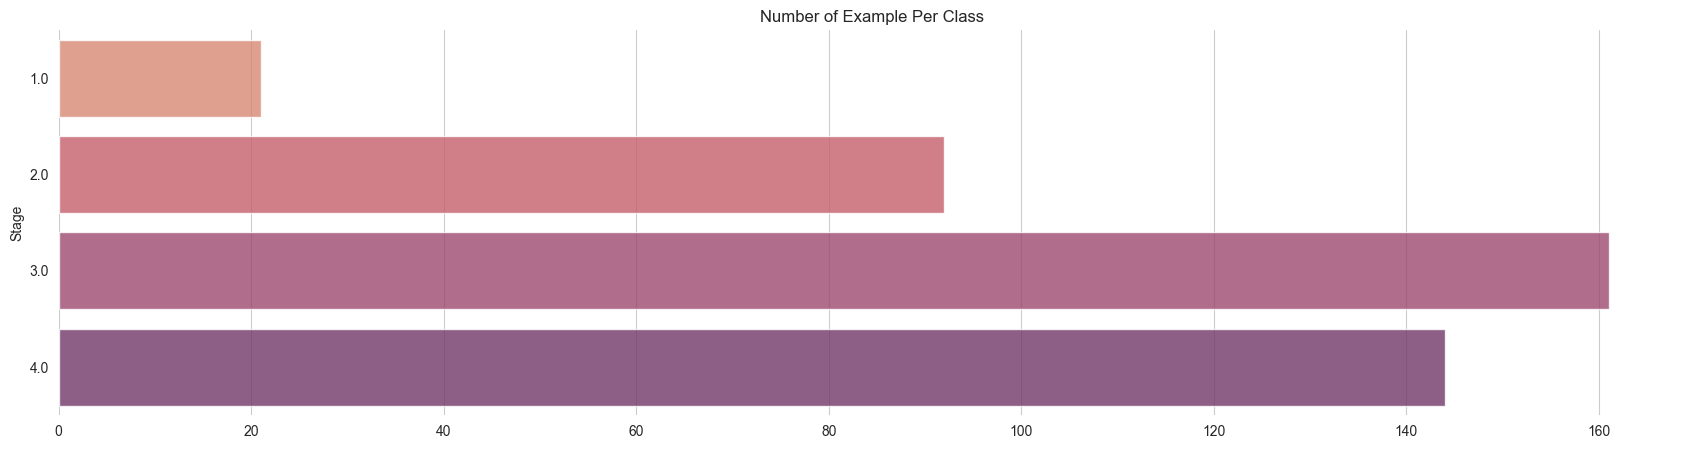

In [64]:
plt.figure(figsize=(21,5))
sns.countplot(y=df['Stage'], palette="flare", alpha=0.8, )
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Number of Example Per Class')

As we can see we have class imbalances in our dataset i.e some classes have more iterations than other. This could make us truggle for our model to train and achieve desired accuracy. so let's try to fix this in coming process.

In [65]:
df['Stage'] = np.where(df['Stage'] == 4,1,0)

# **Now we have got an idea about models in our dataset, so let's try to analyze the patterns if there are any relations with disease.**

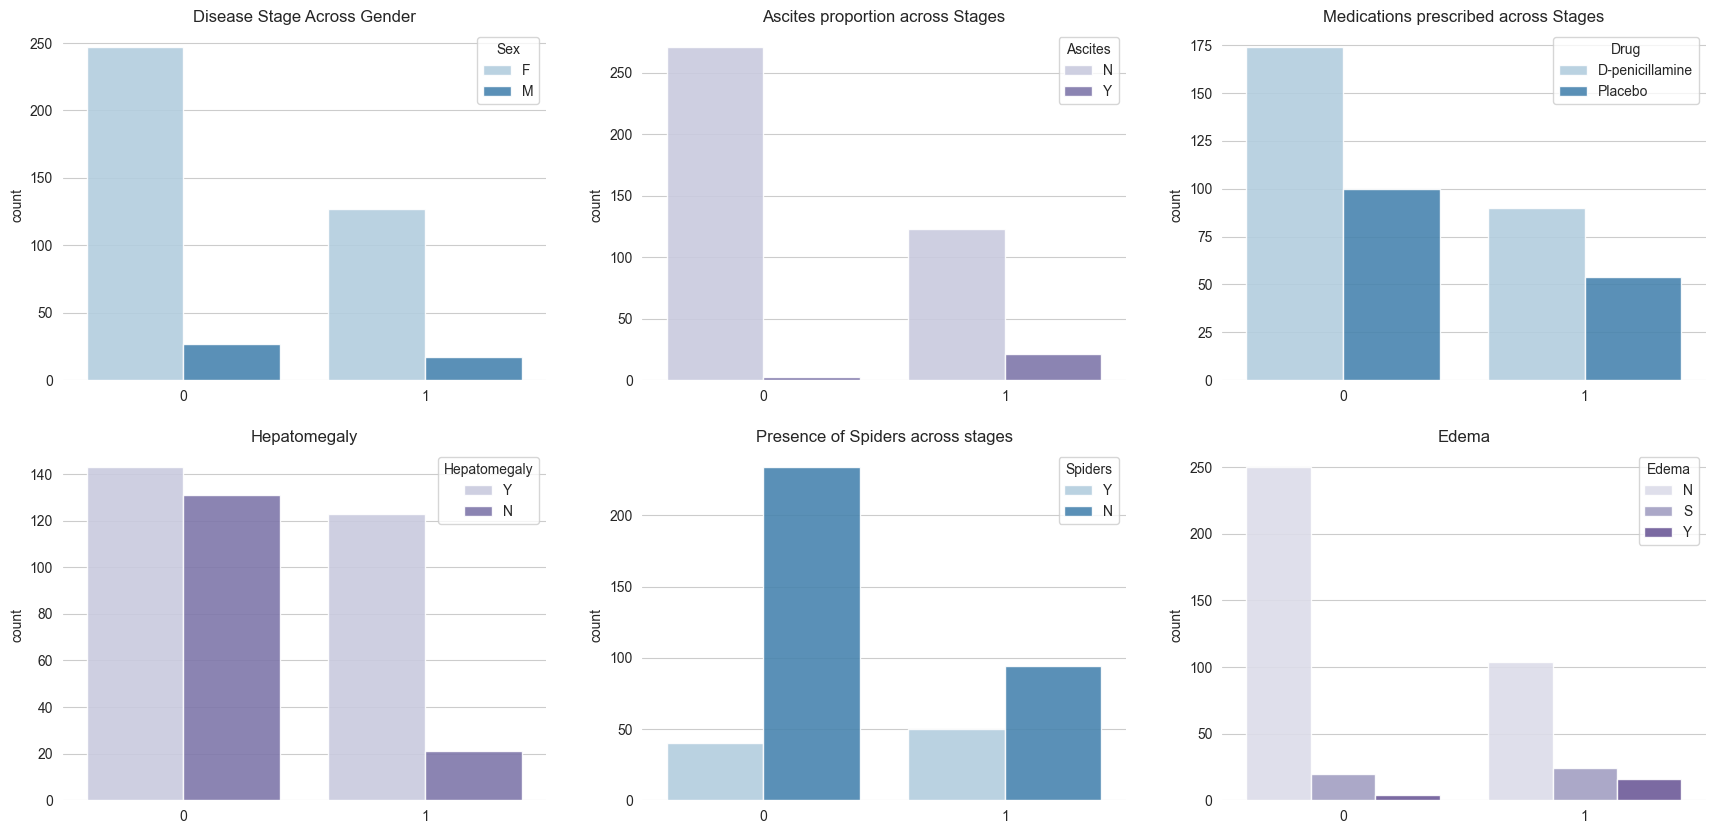

In [66]:
plt.figure(figsize=(21.2,10))

plt.subplot(2,3,1)
sns.countplot(x=df['Stage'], hue=df['Sex'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Disease Stage Across Gender')

plt.subplot(2,3,2)
sns.countplot(x=df['Stage'], hue=df['Ascites'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Ascites proportion across Stages')

plt.subplot(2,3,3)
sns.countplot(x=df['Stage'], hue=df['Drug'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Medications prescribed across Stages');
plt.subplot(2,3,4)
sns.countplot(x=df['Stage'], hue=df['Hepatomegaly'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Hepatomegaly');

plt.subplot(2,3,5)
sns.countplot(x=df['Stage'], hue=df['Spiders'], palette='Blues', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Presence of Spiders across stages');

plt.subplot(2,3,6)
sns.countplot(x=df['Stage'], hue=df['Edema'], palette='Purples', alpha=0.9)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Edema');


**Upon closer examination, intriguing patterns emerge. For instance, when considering Ascites, it becomes evident that the likelihood of disease occurrence escalates with an increase in Ascites. Similarly, the existence of spiders exhibits a positive correlation with the risk of disease.**

# **Now let's try to plot some graphs on different diseases to identify the risk of the disease increase with increase in feature value.** <br>
By this we get a clear idea about different positive co-relation on with the disease probability at different stages:

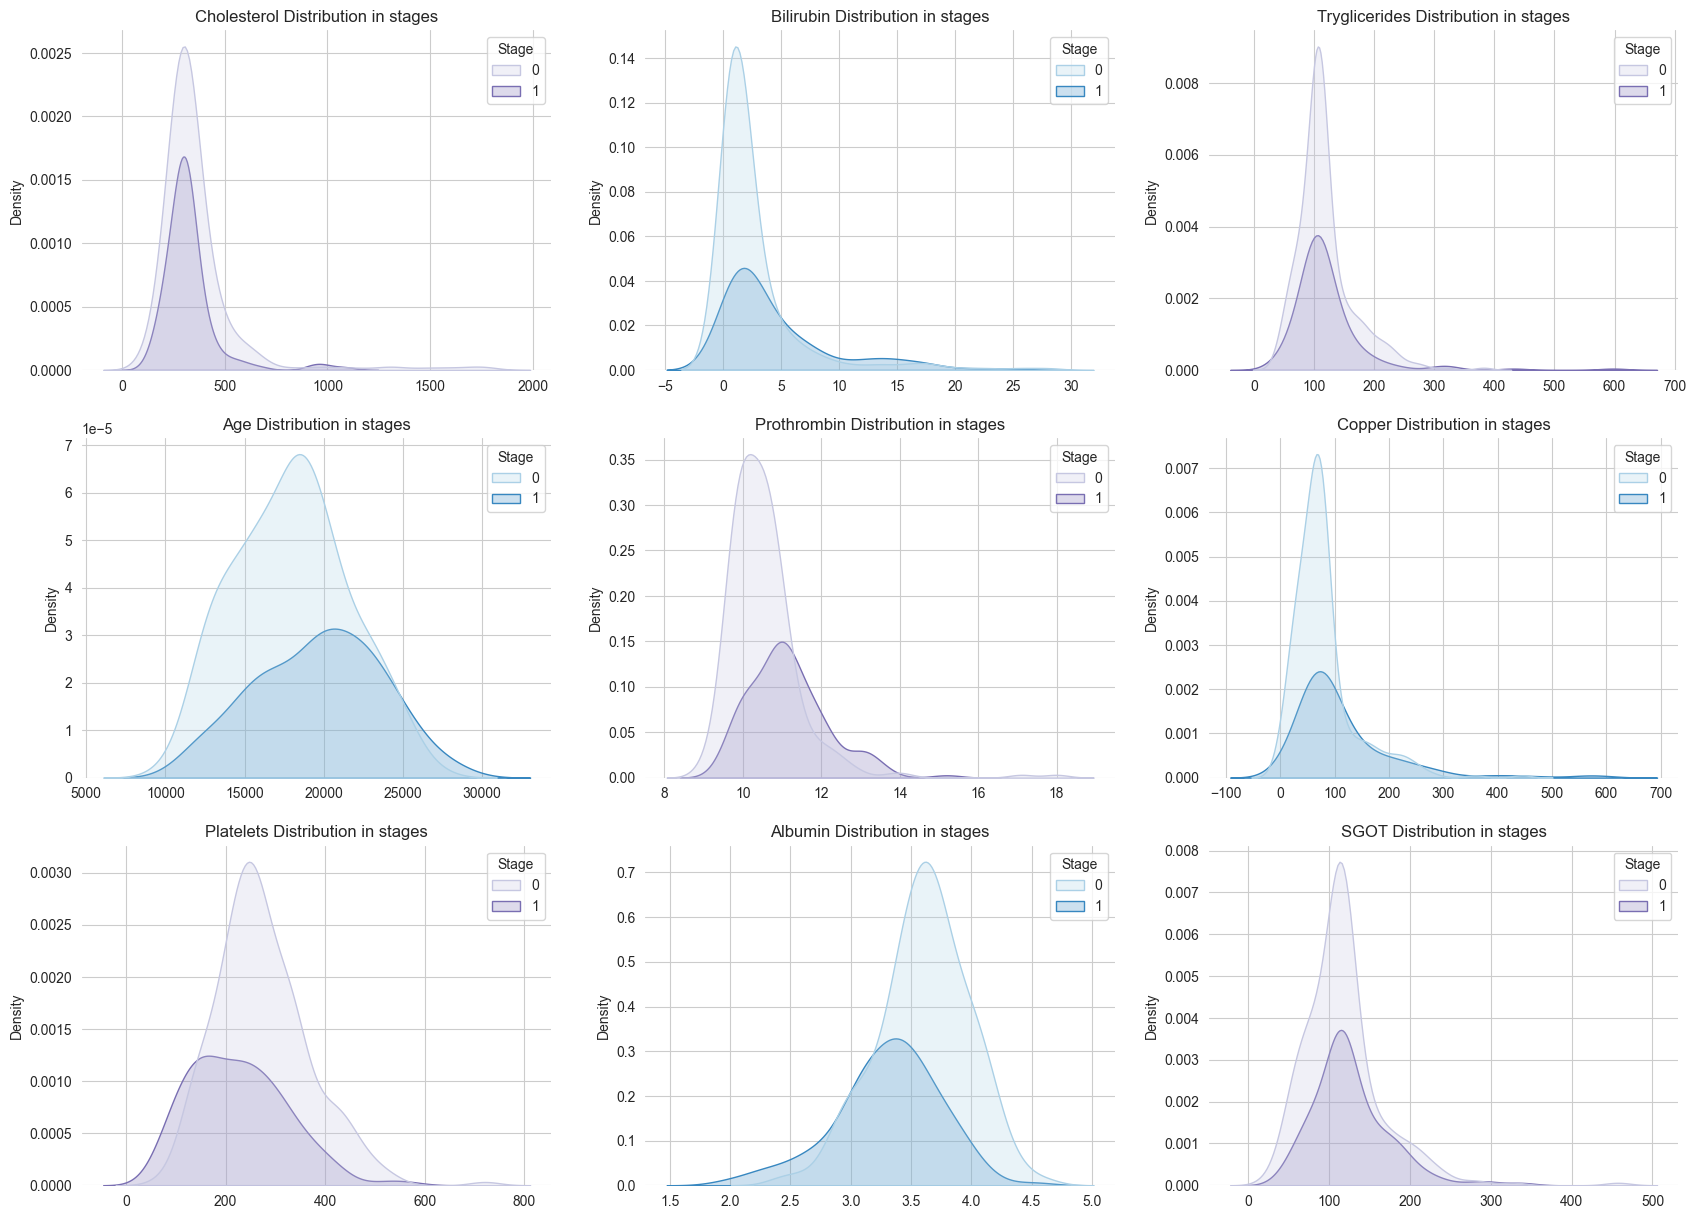

In [67]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(20.6, 15))

# Create subplots for each feature
plt.subplot(3, 3, 1)
sns.kdeplot(data=df, x='Cholesterol', hue='Stage', fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Cholesterol Distribution in stages')

plt.subplot(3, 3, 2)
sns.kdeplot(data=df, x='Bilirubin', hue='Stage', fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Bilirubin Distribution in stages')

plt.subplot(3, 3, 3)
sns.kdeplot(data=df, x='Tryglicerides', hue='Stage', fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Tryglicerides Distribution in stages')

plt.subplot(3, 3, 4)
sns.kdeplot(data=df, x='Age', hue='Stage', fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Age Distribution in stages')

plt.subplot(3, 3, 5)
sns.kdeplot(data=df, x='Prothrombin', hue='Stage', fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Prothrombin Distribution in stages')

plt.subplot(3, 3, 6)
sns.kdeplot(data=df, x='Copper', hue='Stage', fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Copper Distribution in stages')

plt.subplot(3, 3, 7)
sns.kdeplot(data=df, x='Platelets', hue='Stage', fill=True, palette='Purples')
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Platelets Distribution in stages')

plt.subplot(3, 3, 8)
sns.kdeplot(data=df, x='Albumin', hue='Stage', fill=True, palette='Blues', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('Albumin Distribution in stages')

plt.subplot(3, 3, 9)
sns.kdeplot(data=df, x='SGOT', hue='Stage', fill=True, palette='Purples', common_norm=True)
sns.despine(top=True, right=True, bottom=True, left=True)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('')
plt.title('SGOT Distribution in stages')

# Show the plots
plt.show()

# **Let's carryout regression model to find out features.**

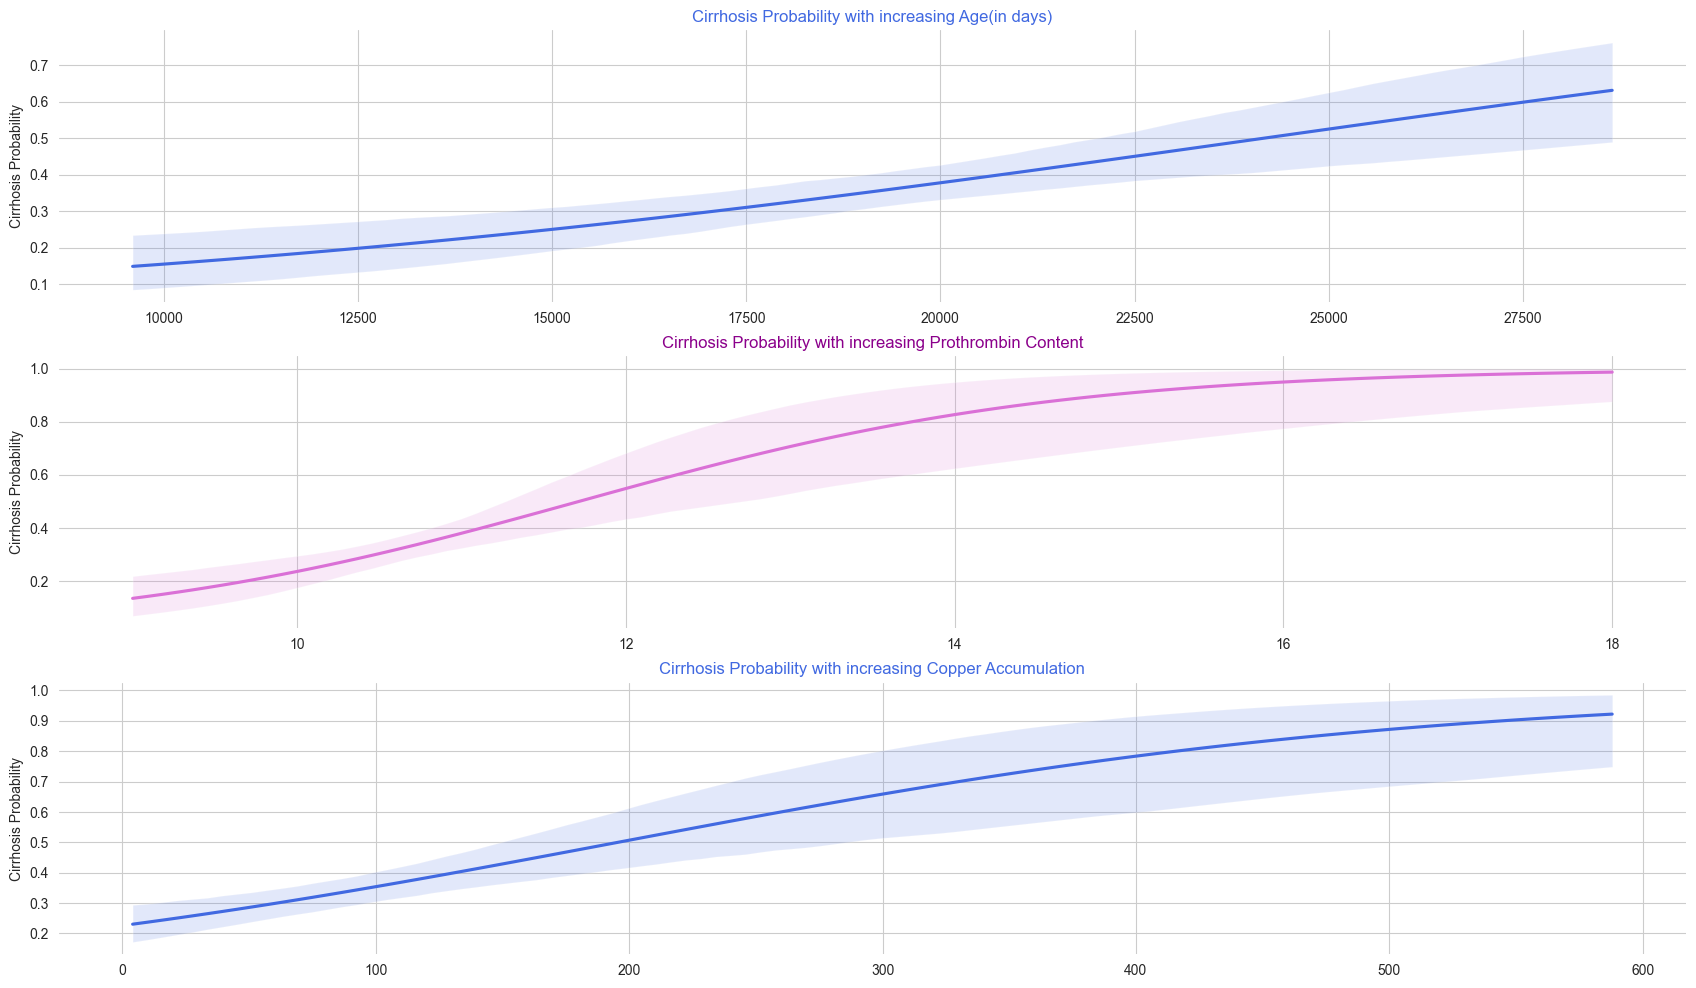

In [68]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Age'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Age(in days)'), color='royalblue') ;

plt.subplot(3,1,2)
sns.regplot(x=df['Prothrombin'], y=df['Stage'], scatter=False, logistic=True, color='orchid');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Prothrombin Content'), color='darkmagenta');

plt.subplot(3,1,3)
sns.regplot(x=df['Copper'], y=df['Stage'], scatter=False, logistic=True, color='royalblue')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with increasing Copper Accumulation'), color='royalblue') ;

**As we can observe from the above regression lines,Attributes like Platelets, Albumin, and Cholesterol showcase a scenario where the likelihood of disease diminishes as the feature values increase. Let's corroborate this observation with additional regression plots.**

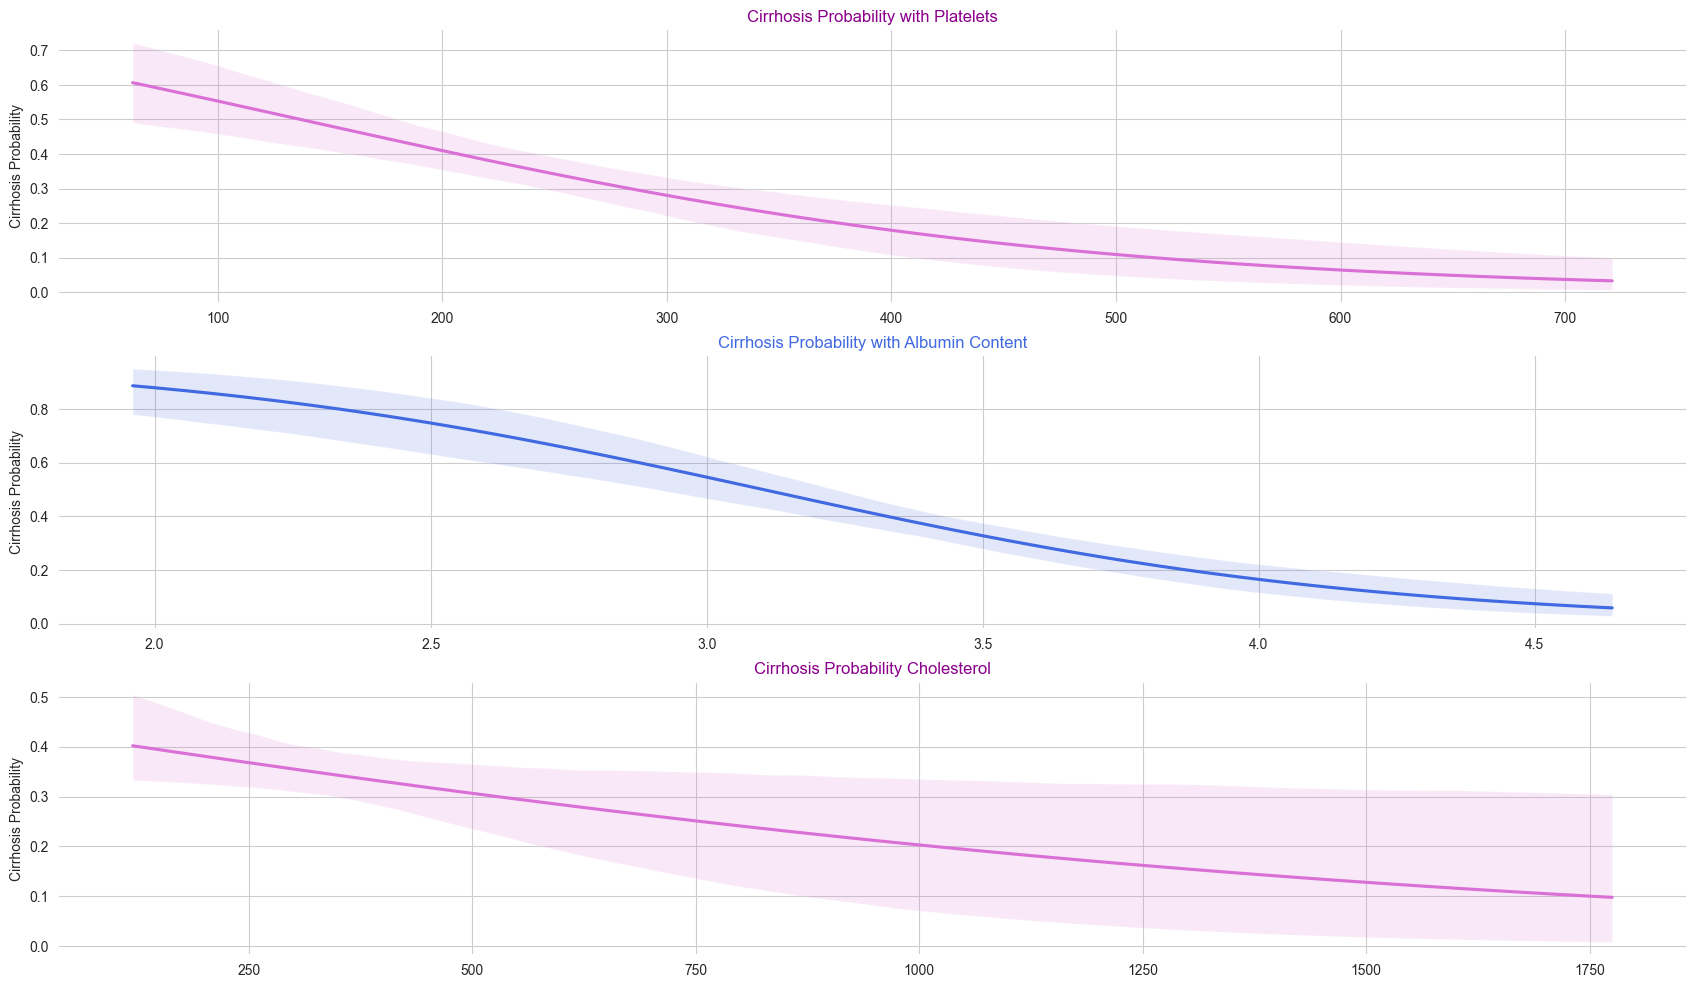

In [69]:
plt.figure(figsize=(21,12))

plt.subplot(3,1,1)
sns.regplot(x=df['Platelets'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Platelets'), color='darkmagenta');

plt.subplot(3,1,2)
sns.regplot(x=df['Albumin'], y=df['Stage'], scatter=False, logistic=True, color='royalblue');
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability with Albumin Content'), color='royalblue');

plt.subplot(3,1,3)
sns.regplot(x=df['Cholesterol'], y=df['Stage'], scatter=False, logistic=True, color='orchid')
sns.despine(fig=None, ax=None, top=True, right=True, left=True, bottom=True, offset=None, trim=False);
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False)
plt.xlabel('');
plt.ylabel('Cirrhosis Probability');
plt.setp(plt.title('Cirrhosis Probability Cholesterol'), color='darkmagenta') ;

As we can observe that, Platelets, Albumin checks with our model, the findings about Cholesterol seems interesting! <br> <br>
we can observe that people with high Cholesterol have lower risk of Cirrhosis, this might not sound correct but our data certainly shows so.

This should help our model predict the target. We will be looking at what features contribute the most in upcoming process of our project.

so, untill now we only had a look at patterns and relations to our dataset. once perform data preprocessing to our model to remove any duplicate values, missing values , null values.
<br> <br>

# **Data Pre-processing:**



In [70]:
df['Sex'] = df['Sex'].replace({'M':0, 'F':1})                                # Male : 0 , Female :1
df['Ascites'] = df['Ascites'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Drug'] = df['Drug'].replace({'D-penicillamine':0, 'Placebo':1})          # D-penicillamine : 0, Placebo : 1
df['Hepatomegaly'] = df['Hepatomegaly'].replace({'N':0, 'Y':1})              # N : 0, Y : 1
df['Spiders'] = df['Spiders'].replace({'N':0, 'Y':1})                        # N : 0, Y : 1
df['Edema'] = df['Edema'].replace({'N':0, 'Y':1, 'S':-1})                    # N : 0, Y : 1, S : -1
df['Status'] = df['Status'].replace({'C':0, 'CL':1, 'D':-1})                 # 'C':0, 'CL':1, 'D':-1



<font color='orange'><b>Warning:</b></font>

As our dataset is collected from [kaggle](https://https://www.kaggle.com/datasets) website it may contains some confidential information. So in our preprocessing and during the whole process we are not going to use **Status**' and '**N_days**' as this may lead to data leakage.

It is importatnt for us to decide model selection before diving into our accuracy result, as wrong model selection may lead to improper and inaccurate accuracy details.

so, while performing initial regression analysis, we found that we found that the data is unevenly distributed,alsio we have seen that we have several relations, and several patters which are inter-related and have same clasess to one pattern..
<br>
<br> As this may lead to confussion let's try
**"Stratified k-Fold Cross Validation".**

# **Model Selection:**

so, first check out a quick Logestic regression classifier and look how it  will perform.

In [71]:

# Setting up Features and Target
X = df.drop(['Status', 'N_Days', 'Stage'], axis=1)
y = df.pop('Stage')


In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

log_model = LogisticRegression(max_iter=5000, solver='saga')
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  log_model.fit(X_train, y_train)
  score = log_model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('Logestic Regression Mean Accuracy = ', np.mean(acc))

For Fold 1 the accuracy is 0.6904761904761905
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.6190476190476191
For Fold 4 the accuracy is 0.6666666666666666
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.6666666666666666
For Fold 7 the accuracy is 0.6904761904761905
For Fold 8 the accuracy is 0.7380952380952381
For Fold 9 the accuracy is 0.7317073170731707
For Fold 10 the accuracy is 0.6341463414634146

Logestic Regression Mean Accuracy =  0.7032520325203252


In [73]:
from sklearn.metrics import classification_report
log_model_predict = log_model.predict(test)
log_model_predict_proba = log_model.predict_proba(test)

print(classification_report(y.iloc[test_index], log_model_predict))

              precision    recall  f1-score   support

           0       0.70      0.78      0.74        27
           1       0.45      0.36      0.40        14

    accuracy                           0.63        41
   macro avg       0.58      0.57      0.57        41
weighted avg       0.62      0.63      0.62        41



In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

# Get predicted probabilities
log_model_predict_proba = log_model.predict_proba(X.iloc[test_index])

# Compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(y.iloc[test_index], log_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

# Print AUC score
print('AUC : ', roc_auc_score(y.iloc[test_index], log_model_predict_proba[:,1]))

AUC :  0.6507936507936508


/var/folders/fp/wq_mk0g90q1949rnmtlz1yzc0000gp/T/ipykernel_14292/2118780987.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=fpr, y=tpr, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)


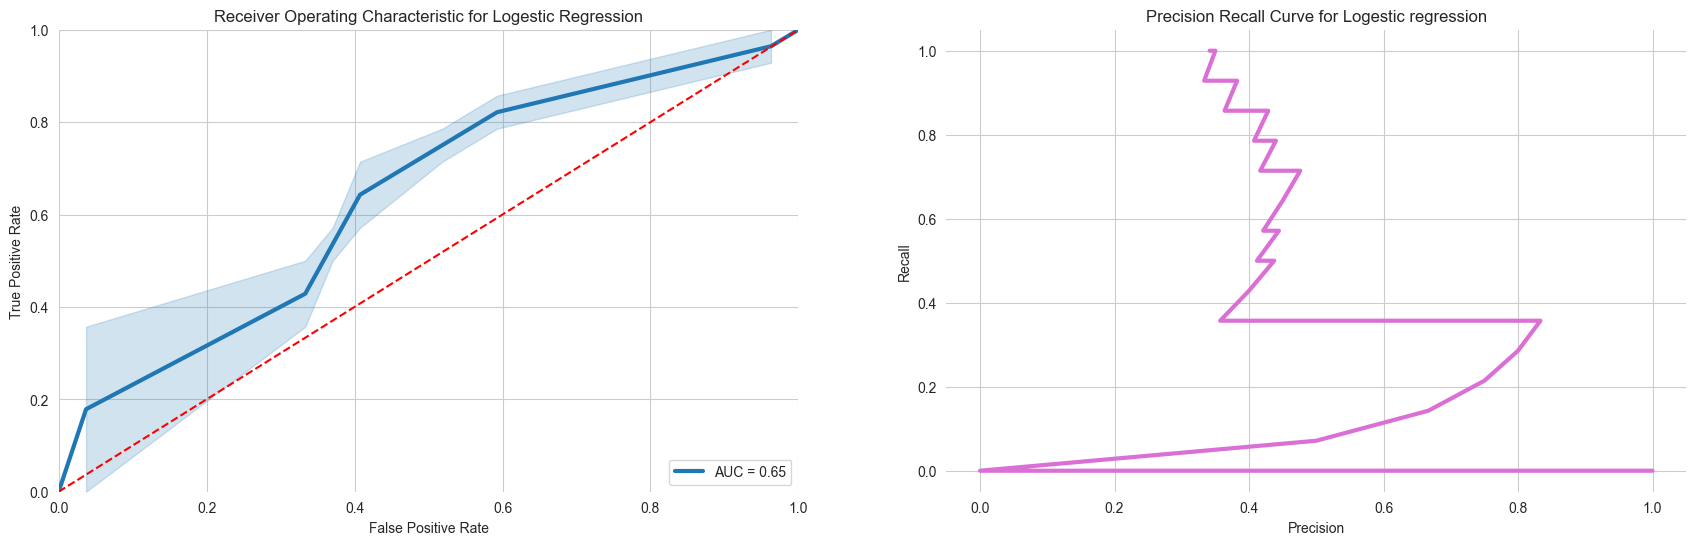

In [27]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic for Logestic Regression')
sns.lineplot(x=fpr, y=tpr, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y.iloc[test_index], log_model_predict_proba[:,1])

plt.subplot(1,2,2)
plt.plot(precision, recall, linewidth=3, color='orchid')
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve for Logestic regression');



so, after  tuning several parameters the logestic regression model was best able achieve about 70% accuracy and with 0.65 AUC. We might get better scores with some more sophisticated model.
<br>
**Lets give a try to Gradient Boosted Classifier from XGboost**.

In [75]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
model = XGBClassifier(learning_rate=0.75, max_depth=3, random_state=1, gamma=0, eval_metric='error') # tried learning rate values between range [0.01 - 10] & depth [2-8]

acc=[]
def training(train, test, fold_no):
  X_train = train
  y_train = y.iloc[train_index]
  X_test = test
  y_test = y.iloc[test_index]
  model.fit(X_train, y_train)
  score = model.score(X_test,y_test)
  acc.append(score)
  print('For Fold {} the accuracy is {}'.format(str(fold_no),score))

fold_no = 1
for train_index,test_index in skf.split(X, y):
  train = X.iloc[train_index,:]
  test = X.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
print()
print('XGboost model Mean Accuracy = ', np.mean(acc))


For Fold 1 the accuracy is 0.7619047619047619
For Fold 2 the accuracy is 0.7857142857142857
For Fold 3 the accuracy is 0.7380952380952381
For Fold 4 the accuracy is 0.7619047619047619
For Fold 5 the accuracy is 0.8095238095238095
For Fold 6 the accuracy is 0.7380952380952381
For Fold 7 the accuracy is 0.7619047619047619
For Fold 8 the accuracy is 0.7857142857142857
For Fold 9 the accuracy is 0.7073170731707317
For Fold 10 the accuracy is 0.7560975609756098

XGboost model Mean Accuracy =  0.7606271777003484


In [76]:
from sklearn.metrics import classification_report
XGB_model_predict = model.predict(test)
XGB_model_predict_proba = model.predict_proba(test)

print(classification_report(y.iloc[test_index], XGB_model_predict))


              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.70      0.50      0.58        14

    accuracy                           0.76        41
   macro avg       0.74      0.69      0.71        41
weighted avg       0.75      0.76      0.74        41



In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y.iloc[test_index], XGB_model_predict_proba[:,1])
roc_auc = auc(fpr, tpr)

print('AUC : ', roc_auc_score(y.iloc[test_index], XGB_model_predict_proba[:,1]))


AUC :  0.7433862433862434


<ipython-input-50-6b8c041d600b>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=fpr, y=tpr, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)


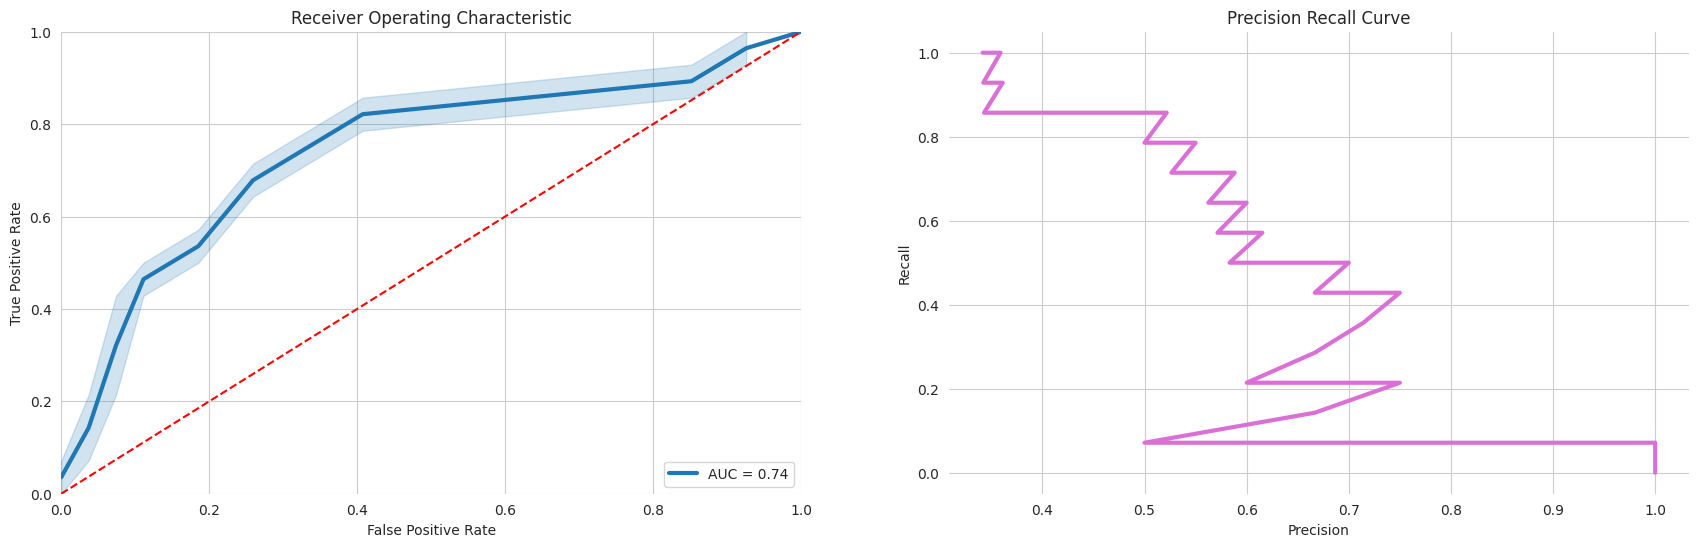

In [50]:
sns.set_style('whitegrid')
plt.figure(figsize=(21,6))

plt.subplot(1,2,1)
plt.title('Receiver Operating Characteristic')
sns.lineplot(x=fpr, y=tpr, label = 'AUC = %0.2f' % roc_auc, palette='purple', linewidth=3)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.tick_params(left=False, bottom=False)
sns.despine(top=True, bottom=True, left=True)

# calculate precision-recall curve
from sklearn.metrics import precision_recall_curve, f1_score
precision, recall, thresholds = precision_recall_curve(y.iloc[test_index], XGB_model_predict_proba[:,1])

plt.subplot(1,2,2)
plt.plot(precision, recall, linewidth=3, color='orchid')
sns.despine(top=True, bottom=True, left=True)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision Recall Curve');


The advancements over logistic regression are quite notable. Presently, we've achieved an AUC of approximately 0.74, accompanied by an impressive accuracy of 74%. It's noteworthy considering our modest dataset of around 400 training examples!

# **Strategies to Enhance Performance:**

**1. Expand Training Dataset:**
The potential for improvement is substantial with a larger training dataset. Our current scores are significant, but they can be further elevated through training the model on a more extensive dataset.<br>
**2. Consider a Convolutional Neural Network (CNN):**
Exploring the implementation of a CNN could be beneficial. CNNs excel in capturing intricate details within the data. In a related project, I employed this approach, transforming it into a multiclass classification task to predict the disease stage.
<br><br>
# **Let's look at the SHAP model and analyse the results:**

In [51]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 10.5 MB/s eta 0:00:00


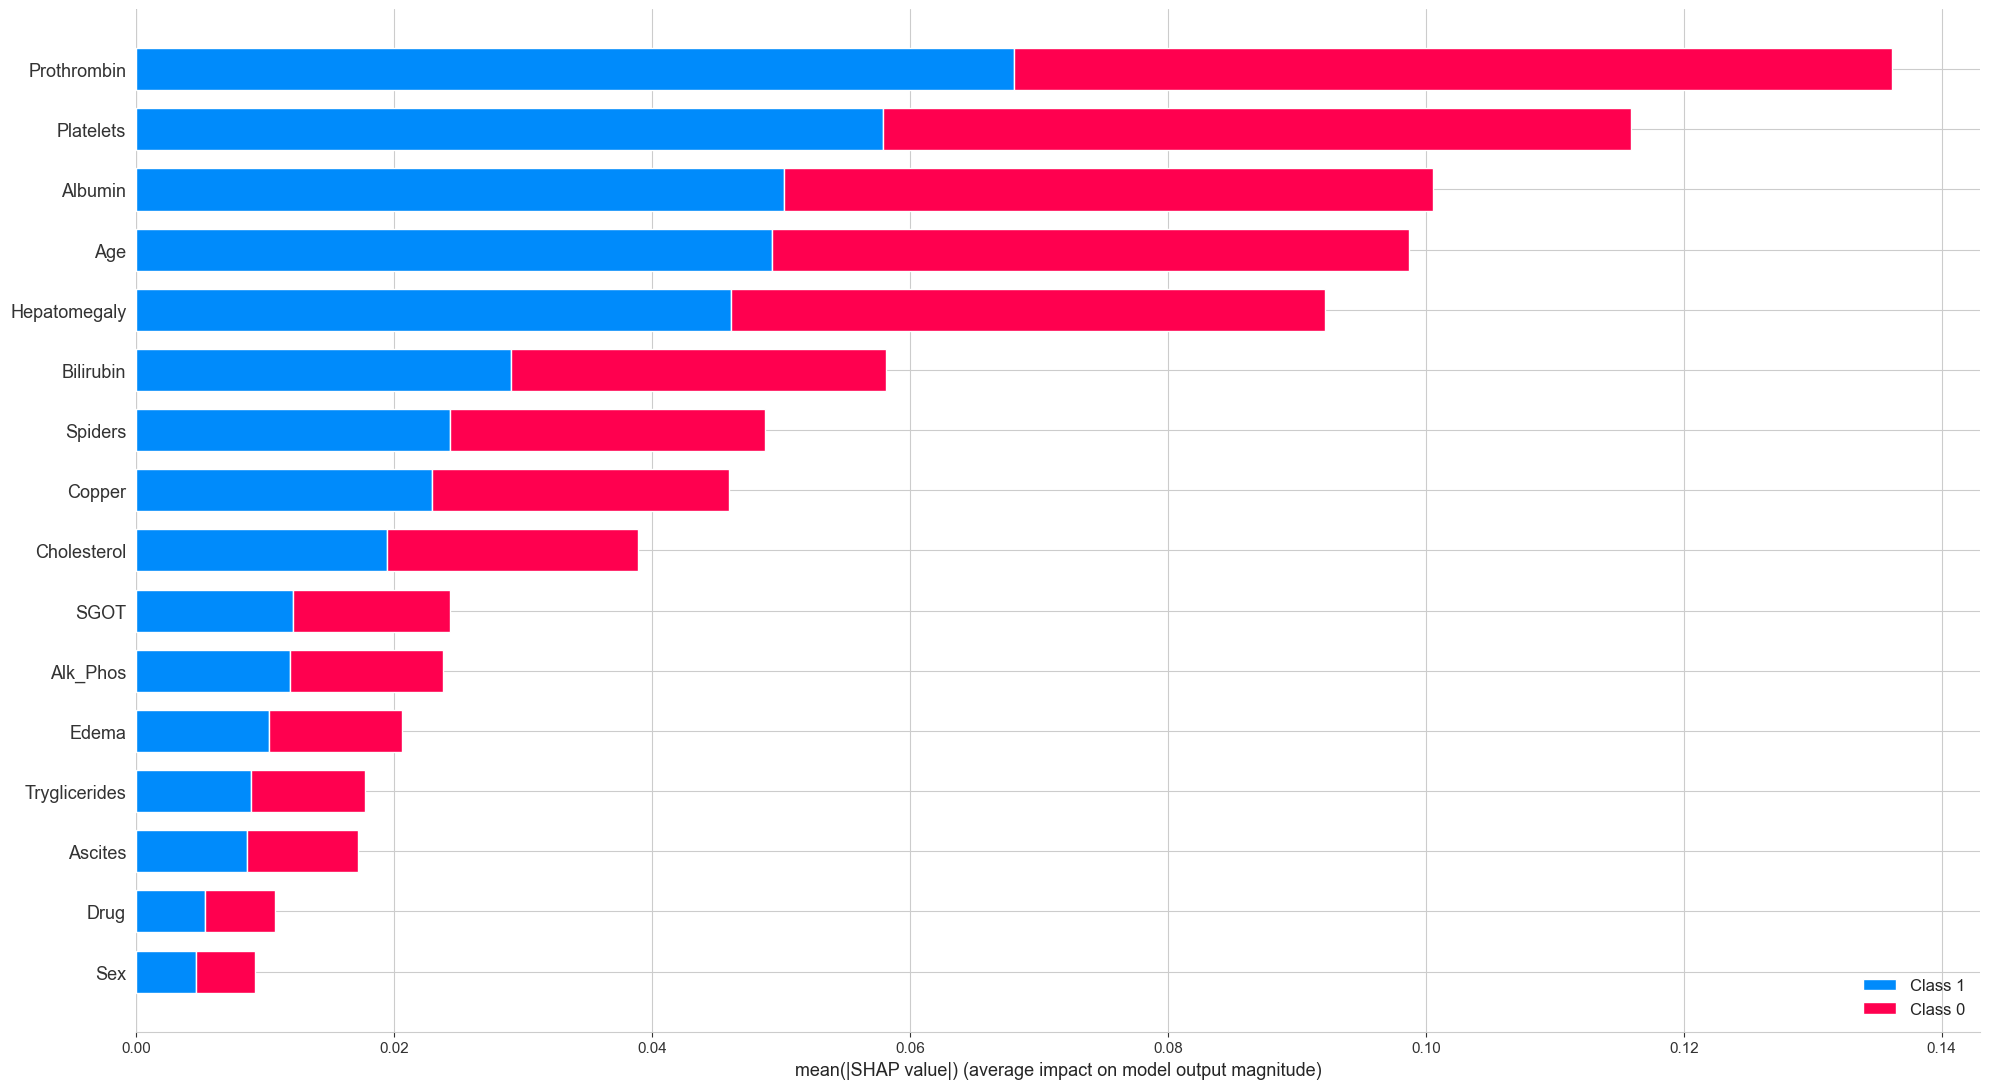

In [78]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already defined and prepared 'train' and 'test' datasets

# Create a Random Forest Classifier
rfc = RandomForestClassifier(max_features=2, n_estimators=100, bootstrap=True)

# Fit the model
rfc.fit(train, y.iloc[train_index])

# Create a SHAP explainer
explainer = shap.TreeExplainer(rfc)

# Calculate SHAP values
shap_values = explainer.shap_values(test)

# Create a summary plot
shap.summary_plot(shap_values, train, plot_size=(20, 11), alpha=0.2, plot_type='bar')

The depicted plot highlights the most influential features in predicting a positive class. Notably, Prothrombin, Albumin, and Hepatomegaly exhibit strong correlations with disease prediction, whereas Gender, Drug, and Ascites show the least correlation.





In [80]:
print(df_encoded.columns)

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'],
      dtype='object')


In [81]:
# Add back the Stage column (target)
df['Stage'] = np.where(df['Status'] == 'D', 1, 0)  # or however you define cirrhosis

In [82]:
df_encoded = df.copy()
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    if col != 'Stage':
        df_encoded[col] = label_enc.fit_transform(df_encoded[col])

In [84]:
df['Stage'] = np.where(df['Status'] == 'D', 1, 0)

In [85]:
print(df['Status'].unique())

[-1  0  1]


In [86]:
print(df['Status'].value_counts())

Status
 0    232
-1    161
 1     25
Name: count, dtype: int64


In [87]:
print(df['Status'].unique())
print(df['Status'].value_counts())



[-1  0  1]
Status
 0    232
-1    161
 1     25
Name: count, dtype: int64


In [88]:
df['Stage'] = np.where(df['Status'] == 1, 1, 0)

In [89]:
print(df['Stage'].value_counts())

Stage
0    393
1     25
Name: count, dtype: int64


In [90]:
X = df.drop('Stage', axis=1)
y = df['Stage']

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Encode categorical variables
df_encoded = df.copy()
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Features and target already defined in your last cell
# X = df.drop('Stage', axis=1)
# y = df['Stage']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))


Logistic Regression Accuracy: 0.9881
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.80      0.89         5

    accuracy                           0.99        84
   macro avg       0.99      0.90      0.94        84
weighted avg       0.99      0.99      0.99        84


Random Forest Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00         5

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


XGBoost Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        79
           1       1.00      1.00      1.00         5

    accuracy                           1.00        84
   macro avg       1.00      1.0

# After analysing graphs and accuracy, the stage variation is the crucial part.


This means the Logistic Regression model correctly predicted liver cirrhosis status in 98.8% of test cases.

However, since Stage 1 patients are only 25 out of 418 (a class imbalance), high accuracy can sometimes be misleading. That’s why recall and precision for minority class (Stage 1) are more important in medical prediction tasks.

That is the reason, we are cross verifyning recall values along with accuracy to know the exact response after an algorithm.

In [93]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 2: Load your dataset
# Replace this with your actual data loading code
# For example, if csv:
# df = pd.read_csv('your_file.csv')
# For now, assuming df is already loaded

# Step 3: Check your dataset columns and data
print(df.head())
print(df.columns)

# Step 4: Check if 'Stage' exists, if not create it
# (Example logic: create binary Stage based on Status, adjust as per your data)
if 'Stage' not in df.columns:
    df['Stage'] = np.where(df['Status'] == 1, 1, 0)

print(df['Stage'].value_counts())

# Step 5: Define features and target
X = df.drop('Stage', axis=1)
y = df['Stage']

# Step 6: Encode categorical columns in features
df_encoded = X.copy()
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

# Now X is encoded features
X_encoded = df_encoded

# Step 7: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

# Step 8: Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Step 9: Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, preds))

    N_Days  Status  Drug    Age  Sex  Ascites  Hepatomegaly  Spiders  Edema  \
ID                                                                            
1      400      -1     0  21464    1        1             1        1      1   
2     4500       0     0  20617    1        0             1        1      0   
3     1012      -1     0  25594    0        0             0        0     -1   
4     1925      -1     0  19994    1        0             1        1     -1   
5     1504       1     1  13918    1        0             1        1      0   

    Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
ID                                                                             
1        14.5        261.0     2.60   156.0    1718.0  137.95          172.0   
2         1.1        302.0     4.14    54.0    7394.8  113.52           88.0   
3         1.4        176.0     3.48   210.0     516.0   96.10           55.0   
4         1.8        244.0     2.54    64.0   

# **So the final answer is:

Logistic Regression gave 98.8% accuracy, meaning it correctly predicts liver cirrhosis status in most cases, but Random Forest and XGBoost performed even better, with 100% accuracy on your current dataset. So, Logistic Regression is not necessarily better — it’s slightly less accurate than the others in this case.